<a href="https://colab.research.google.com/github/Yuichiro3/YuichiroKobayashi/blob/main/SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install semopy

     |████████████████████████████████| 1.6 MB 7.8 MB/s 
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657805 sha256=2dfb3da35ddd3b216904b93d9267cfc9b2d81aad763816e1fb61fe21ac48ede8
  Stored in directory: /root/.cache/pip/wheels/6e/7c/8d/e50ec69d2674e8bc29217ea96f904e4aec6b9df9a585cf7e24
Successfully built semopy


In [2]:
pip install graphviz

In [3]:
pip install see

In [4]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from see import see

import semopy
from semopy import Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_all = pd.read_csv("datasets_for_SEM.csv")
df_all.head()

,Tool,ui_1,ui_2,ui_3,ux_1,ux_2,ux_3,cs_1,cs_2,cs_3,sf_1,sf_2,sf_3
0,A,5,4,5,5,5,5,5,5,4,5,4,5
1,A,4,5,4,4,4,4,5,4,5,4,4,5
2,B,3,4,3,2,2,3,4,3,2,3,4,2
3,C,3,2,3,1,2,3,3,3,1,3,3,1
4,C,1,3,1,1,2,1,2,3,2,1,3,2


In [6]:
mod = """
                ui =~ ui_1 + ui_2 + ui_3 
                ux =~ ux_1 + ux_2 + ux_3
                cs =~ cs_1 + cs_2 + cs_3 
                sf =~ sf_1+sf_2+sf_3 
                
                sf ~ ui + ux + cs
            """
model = Model(mod)

In [7]:
result = model.fit(df_all)

In [8]:
inspect = model.inspect()
print(inspect)

    lval  op  rval  Estimate   Std. Err   z-value   p-value
0     sf   ~    ui -3.978360  12.963197 -0.306897  0.758922
1     sf   ~    ux -1.808459   5.914753 -0.305754  0.759792
2     sf   ~    cs  6.343045  16.264279  0.389999  0.696538
3   ui_1   ~    ui  1.000000          -         -         -
4   ui_2   ~    ui  1.031823   0.213905  4.823747  0.000001
5   ui_3   ~    ui  0.837776   0.210418  3.981487  0.000068
6   ux_1   ~    ux  1.000000          -         -         -
7   ux_2   ~    ux  1.000853    0.22332  4.481707  0.000007
8   ux_3   ~    ux  1.027552   0.179108  5.737048       0.0
9   cs_1   ~    cs  1.000000          -         -         -
10  cs_2   ~    cs  0.921661   0.148037  6.225888       0.0
11  cs_3   ~    cs  1.135713   0.222981  5.093309       0.0
12  sf_1   ~    sf  1.000000          -         -         -
13  sf_2   ~    sf  0.655142   0.160423  4.083844  0.000044
14  sf_3   ~    sf  0.982085   0.209398  4.690038  0.000003
15    sf  ~~    sf  0.993860   2.954097 

In [9]:
import graphviz

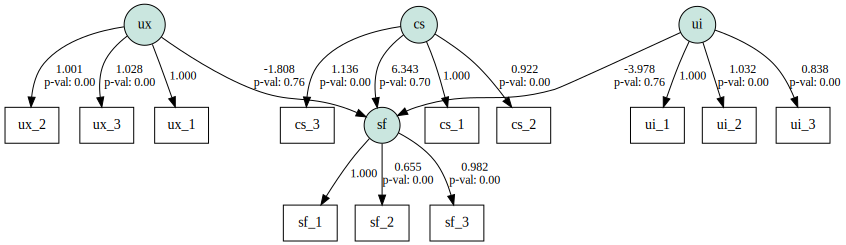

In [10]:
semopy.semplot(model,"graph.png")

In [11]:
stats = semopy.calc_stats(model)
print(stats.T)

                    Value
DoF             48.000000
DoF Baseline    66.000000
chi2            93.853117
chi2 p-value     0.000085
chi2 Baseline  327.359285
CFI              0.824559
GFI              0.713302
AGFI             0.605791
NFI              0.713302
TLI              0.758769
RMSEA            0.224227
AIC             50.614688
BIC             80.486657
LogLik           4.692656
